- Invoice id: Computer generated sales slip invoice identification number
- Branch: Branch of supercenter (3 branches are available identified by A, B and C).
- City: Location of supercenters
- Customer type: Type of customers, recorded by Members for customers using member card and Normal for without member card.
- Gender: Gender type of customer
- Product line: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel
-Unit price: Price of each product in $
-Quantity: Number of products purchased by customer
- Tax: 5% tax fee for customer buying
- Total: Total price including tax
- Date: Date of purchase (Record available from January 2019 to March 2019)
- Time: Purchase time (10am to 9pm)
- Payment: Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)
- COGS: Cost of goods sold
- Gross margin percentage: Gross margin percentage
- Gross income: Gross income
- Rating: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
!ls

 Untitled.ipynb  'supermarket_sales - Sheet1.csv'


In [75]:
df = pd.read_csv('supermarket_sales - Sheet1.csv')

# Огляд даних

In [76]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [77]:
df.shape

(1000, 17)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [79]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [80]:
df.describe(include='object')

,Invoice ID,Branch,City,Customer type,Gender,Product line,Date,Time,Payment
count,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,1000,3,3,2,2,6,89,506,3
top,849-09-3807,A,Yangon,Member,Female,Fashion accessories,2/7/2019,19:48,Ewallet
freq,1,340,340,501,501,178,20,7,345


In [81]:
df.duplicated().sum()

0

# Предобробка даних

In [82]:
df.drop('Invoice ID', axis=1, inplace=True)

In [83]:
df.columns = ['_'.join(i.lower().split()) for i in df.columns]
df.columns

Index(['branch', 'city', 'customer_type', 'gender', 'product_line',
       'unit_price', 'quantity', 'tax_5%', 'total', 'date', 'time', 'payment',
       'cogs', 'gross_margin_percentage', 'gross_income', 'rating'],
      dtype='object')

In [84]:
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'])

In [85]:
df.head()

,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5%,total,date,time,payment,cogs,gross_margin_percentage,gross_income,rating,datetime
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,2019-01-05 13:08:00
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,2019-03-08 10:29:00
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,2019-03-03 13:23:00
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,2019-01-27 20:33:00
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,2019-02-08 10:37:00


In [86]:
df.drop(['date', 'time'], axis=1, inplace=True)

In [87]:
df.rename(columns={'tax_5%': 'tax_5'}, inplace=True)

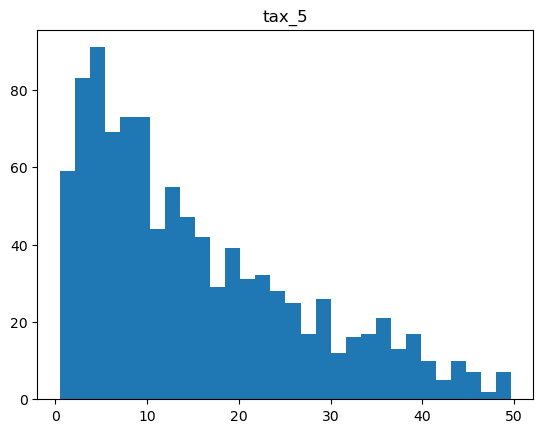

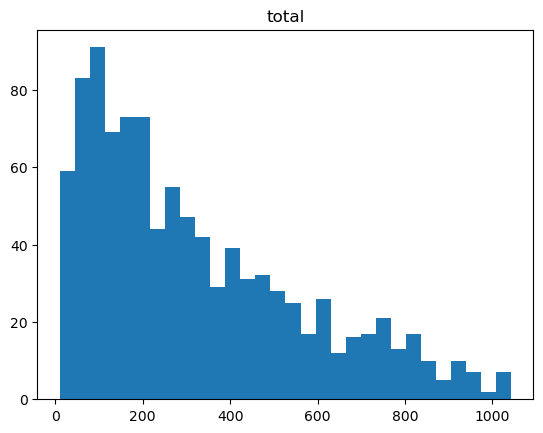

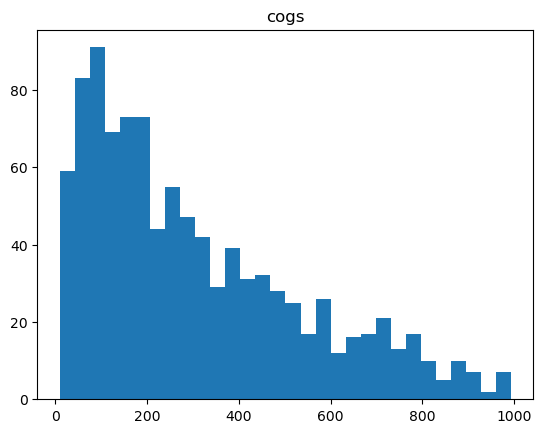

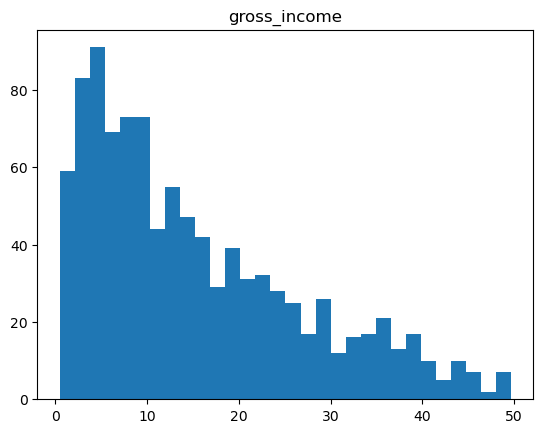

In [88]:
colms = ['tax_5', 'total', 'cogs', 'gross_income']
for i in colms:
    plt.hist(df[i], bins=30)
    plt.title(i)
    plt.show();

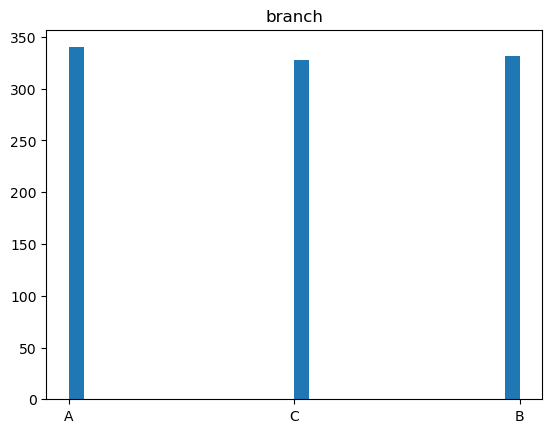

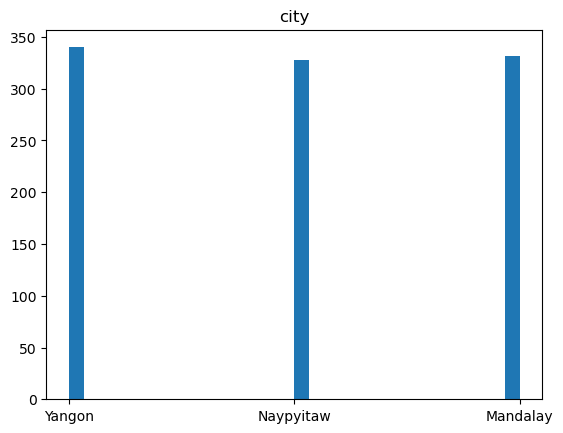

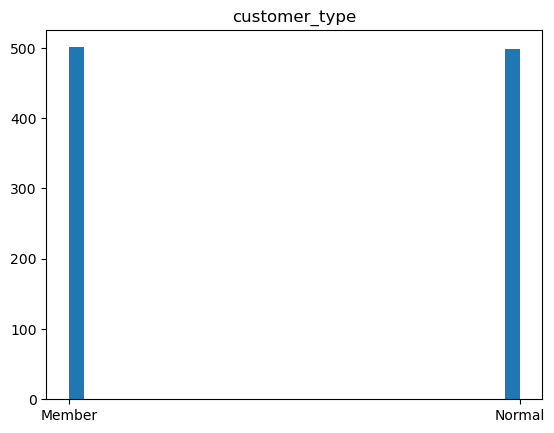

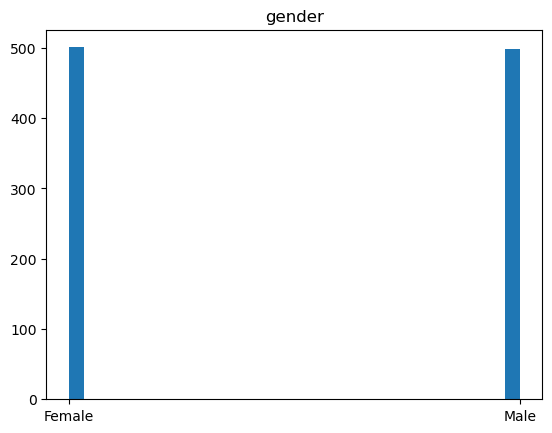

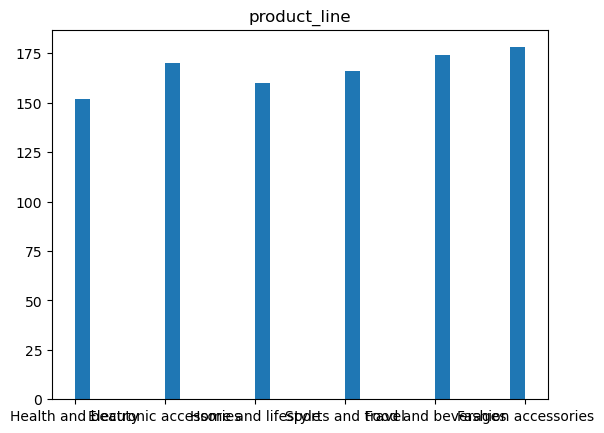

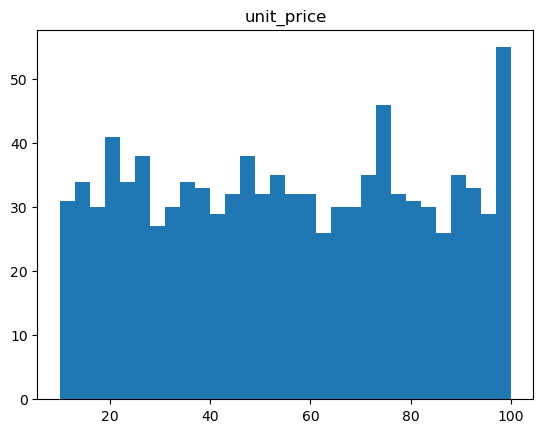

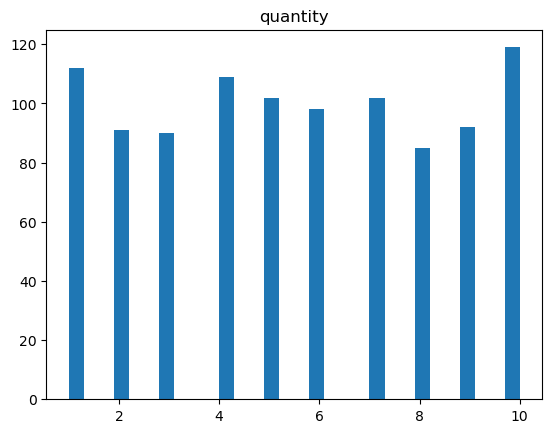

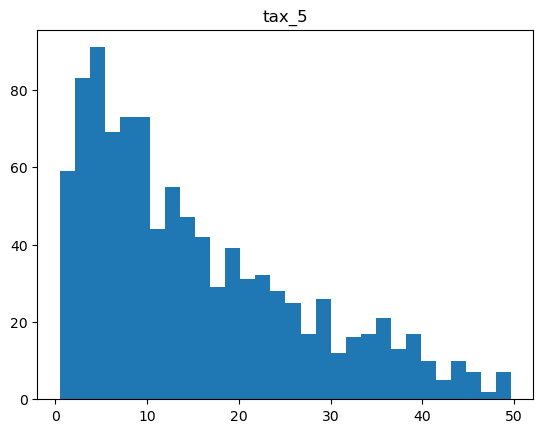

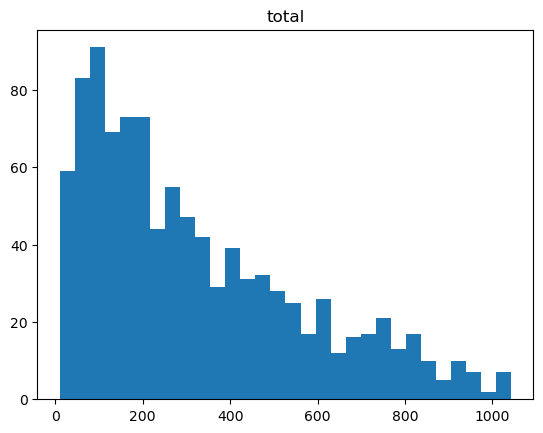

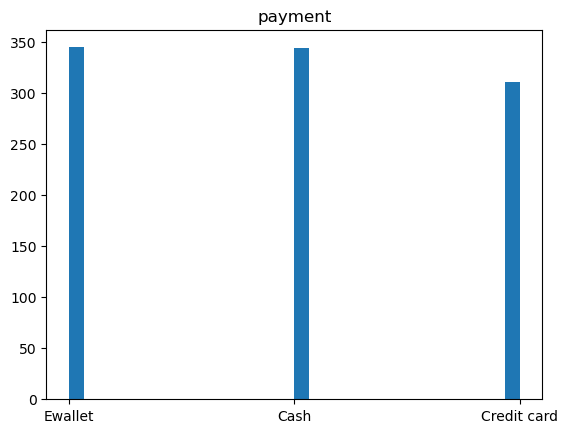

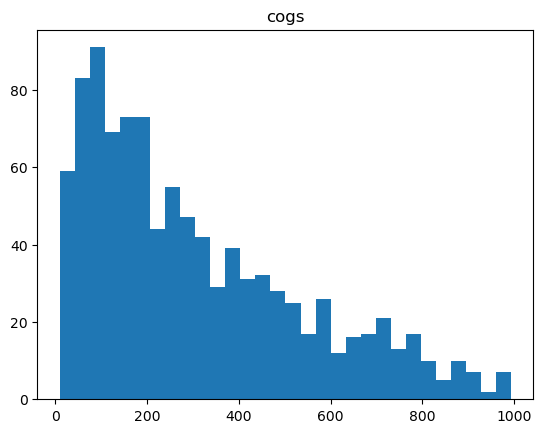

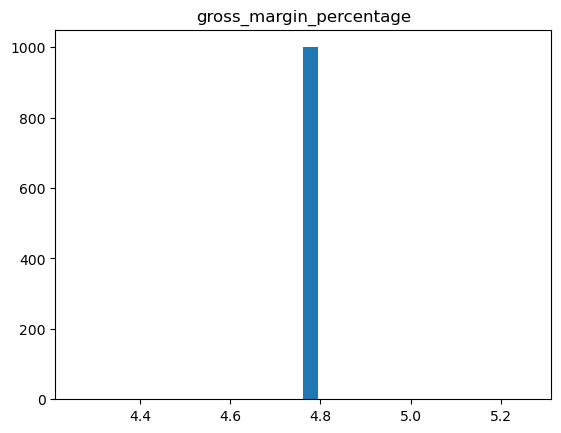

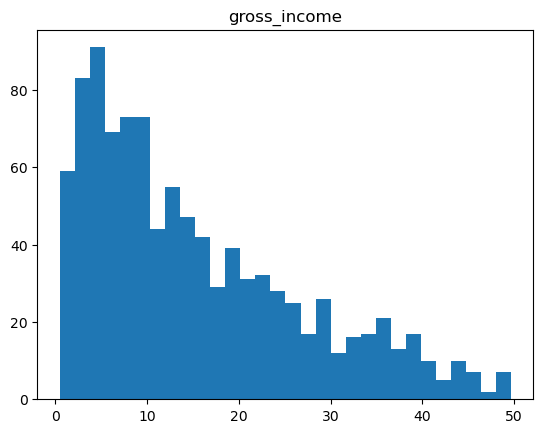

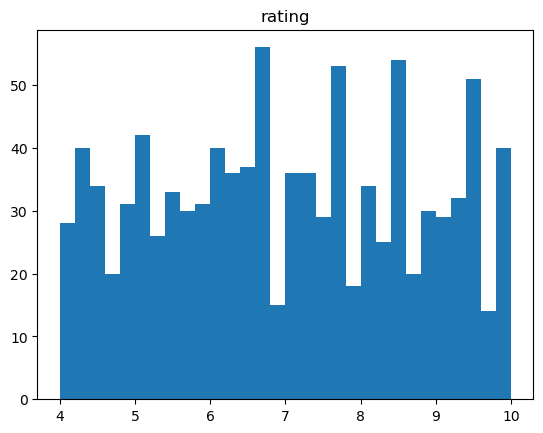

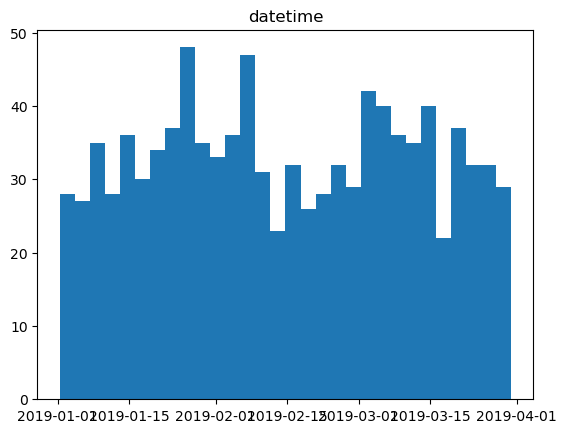

In [99]:
for i in [i for i in df.columns]:
    plt.hist(df[i], bins=30)
    plt.title(i)
    plt.show();

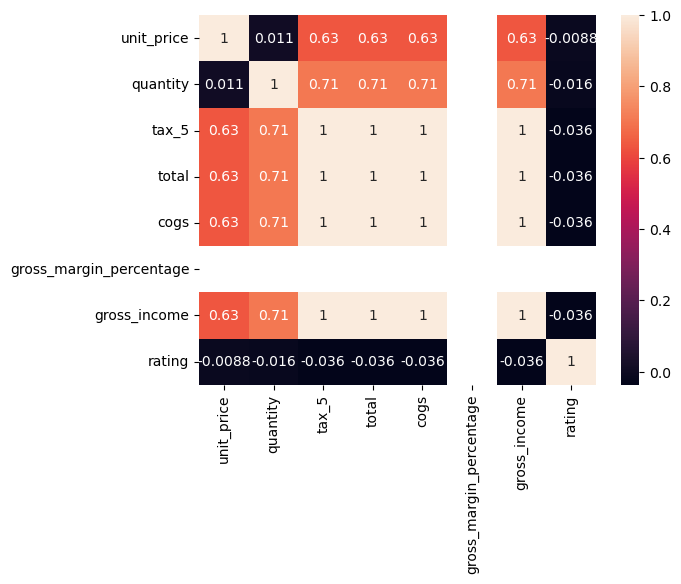

In [110]:
corr = df[[i for i in df.columns if df[i].dtype not in ['O', 'M8[ns]']]].corr()
sns.heatmap(corr, annot=True)
plt.show();

In [119]:
dummie = pd.get_dummies(df[[i for i in df.columns if df[i].dtype == 'O']]) * 1

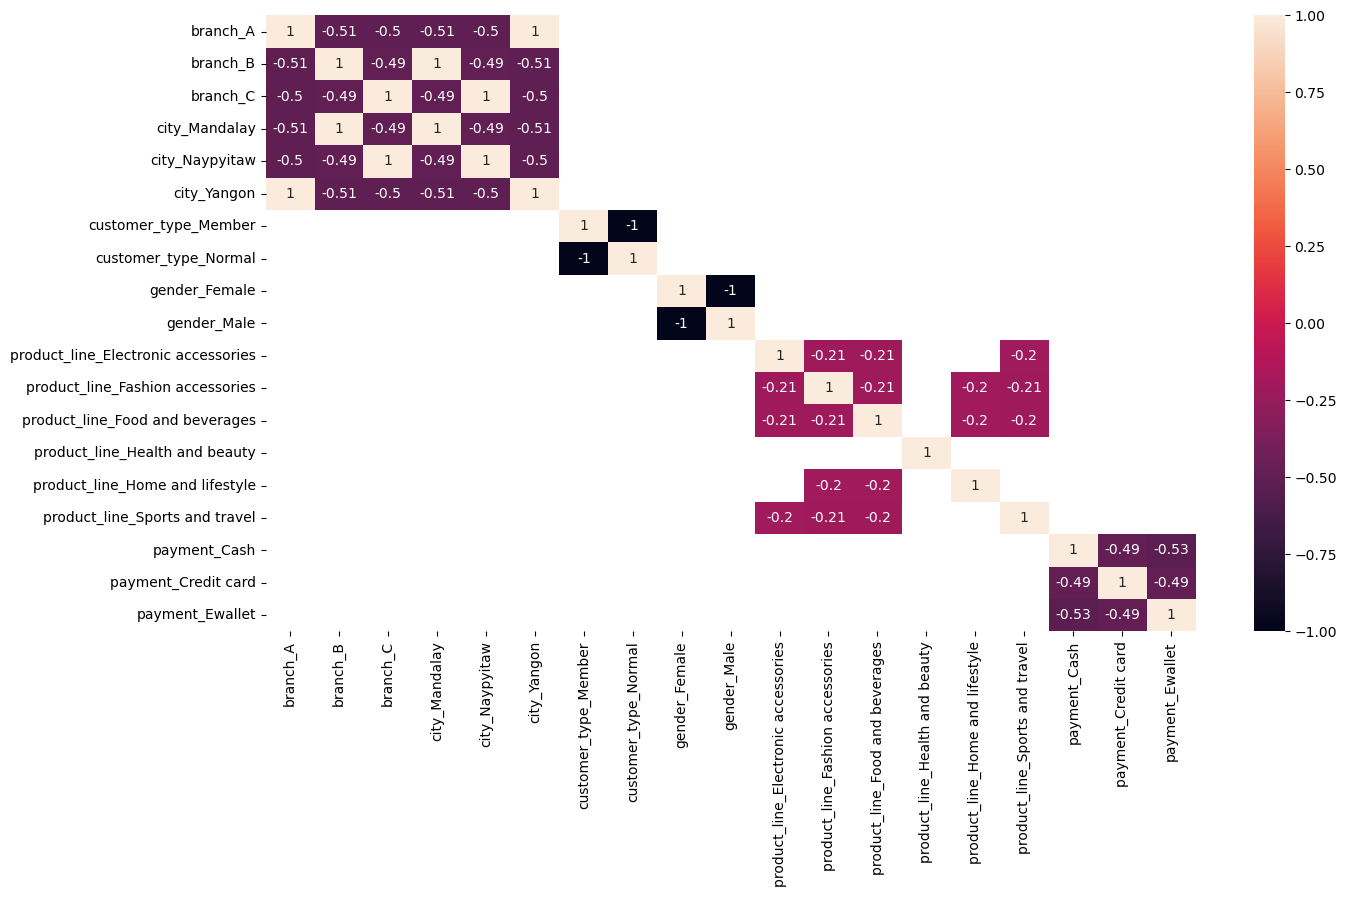

In [132]:
corr = dummie.corr()

plt.figure(figsize=(15,8))
sns.heatmap(corr[np.abs(corr) > 0.2], annot=True)
plt.show();

In [151]:
for i in df['branch'].unique():
    print(i, df[df['branch'] == i]['city'].value_counts(), '\n')

A city
Yangon    340
Name: count, dtype: int64 

C city
Naypyitaw    328
Name: count, dtype: int64 

B city
Mandalay    332
Name: count, dtype: int64 



In [139]:
for i in df['customer_type'].unique():
    print(df[df['customer_type'] == i]['gender'].value_counts(), '\n')

gender
Female    261
Male      240
Name: count, dtype: int64 

gender
Male      259
Female    240
Name: count, dtype: int64 



In [143]:
df_copy = df.drop(['tax_5', 'total', 'cogs', 'gross_income', 
                   'branch', 'gross_margin_percentage'], axis=1)

In [144]:
df_copy.head()

,city,customer_type,gender,product_line,unit_price,quantity,payment,rating,datetime
0,Yangon,Member,Female,Health and beauty,74.69,7,Ewallet,9.1,2019-01-05 13:08:00
1,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,Cash,9.6,2019-03-08 10:29:00
2,Yangon,Normal,Male,Home and lifestyle,46.33,7,Credit card,7.4,2019-03-03 13:23:00
3,Yangon,Member,Male,Health and beauty,58.22,8,Ewallet,8.4,2019-01-27 20:33:00
4,Yangon,Normal,Male,Sports and travel,86.31,7,Ewallet,5.3,2019-02-08 10:37:00


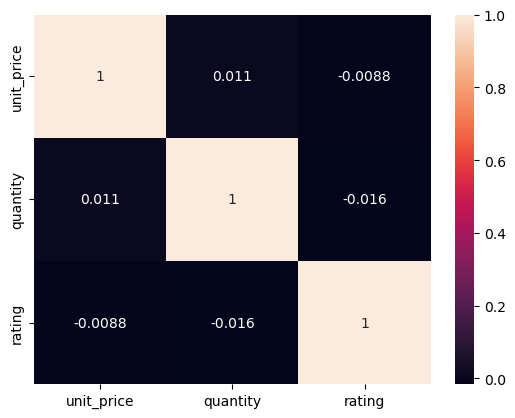

In [165]:
corr = df_copy[['unit_price', 'quantity', 'rating']].corr()
sns.heatmap(corr, annot=True)
plt.show();

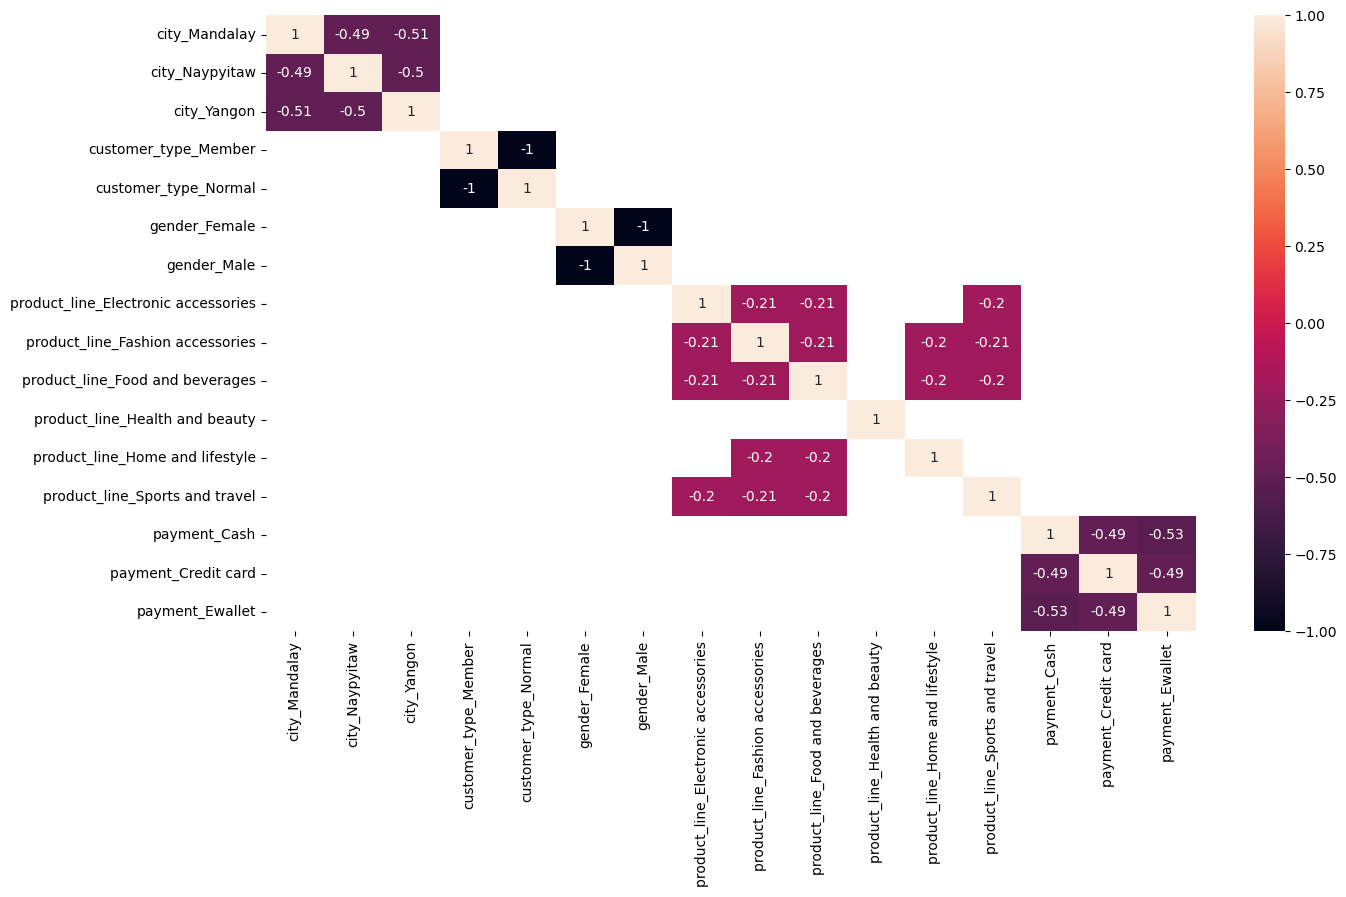

In [166]:
dummie = pd.get_dummies(df_copy[['city', 'customer_type', 'gender', 'product_line', 'payment']]) * 1
corr = dummie.corr()

plt.figure(figsize=(15,8))
sns.heatmap(corr[np.abs(corr) > 0.2], annot=True)
plt.show();

# Аналіз даних

In [167]:
df_copy['dayofweek'] = df_copy['datetime'].dt.dayofweek
df_copy['time_hour'] = df_copy['datetime'].dt.hour
df_copy['total'] = df_copy['unit_price'] * df_copy['quantity']

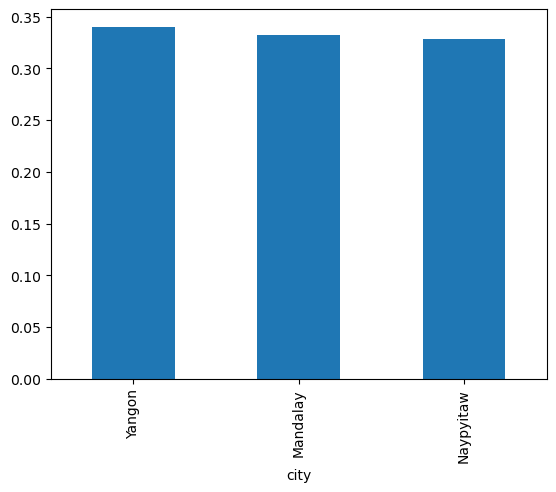

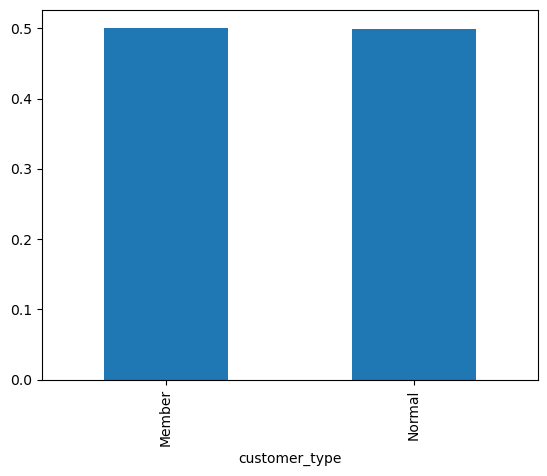

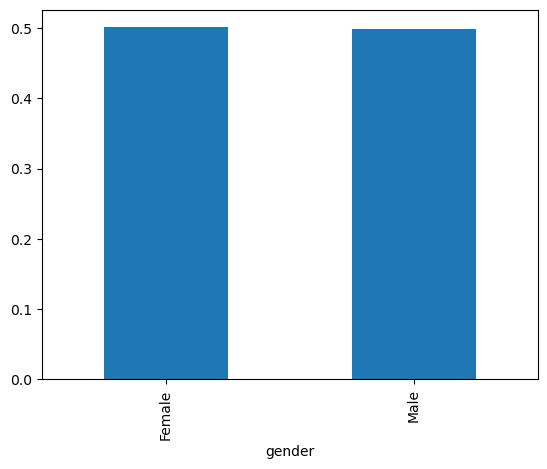

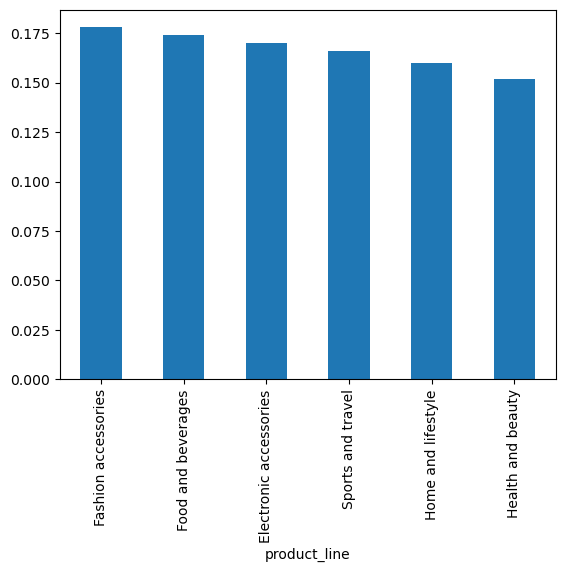

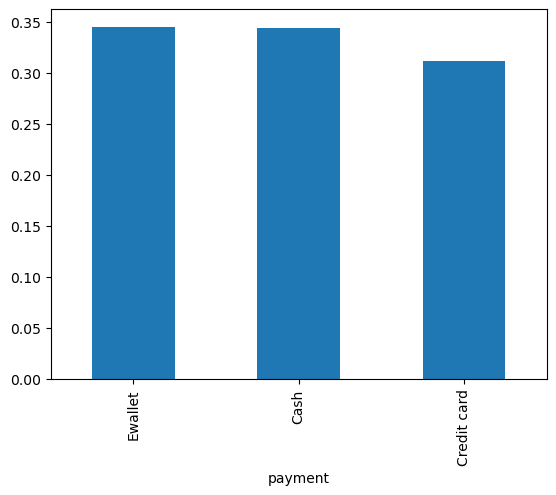

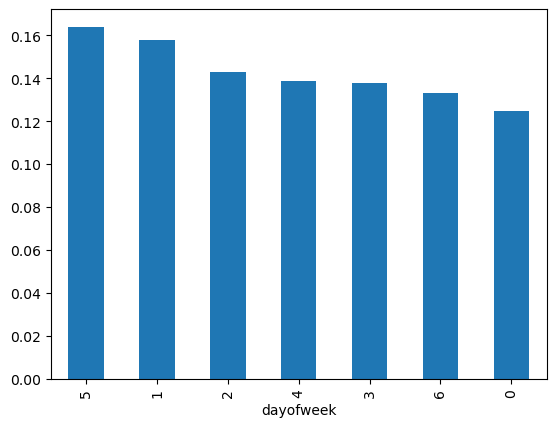

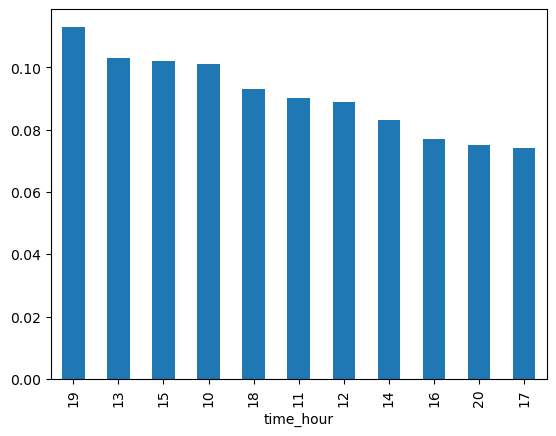

In [206]:
for i in ['city', 'customer_type', 'gender', 'product_line', 'payment', 'dayofweek', 'time_hour']:
    df_copy[i].value_counts(normalize=True).plot(kind='bar')
    plt.show();

In [168]:
df_copy.head()

,city,customer_type,gender,product_line,unit_price,quantity,payment,rating,datetime,dayofweek,time_hour,total
0,Yangon,Member,Female,Health and beauty,74.69,7,Ewallet,9.1,2019-01-05 13:08:00,5,13,522.83
1,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,Cash,9.6,2019-03-08 10:29:00,4,10,76.40
2,Yangon,Normal,Male,Home and lifestyle,46.33,7,Credit card,7.4,2019-03-03 13:23:00,6,13,324.31
3,Yangon,Member,Male,Health and beauty,58.22,8,Ewallet,8.4,2019-01-27 20:33:00,6,20,465.76
4,Yangon,Normal,Male,Sports and travel,86.31,7,Ewallet,5.3,2019-02-08 10:37:00,4,10,604.17


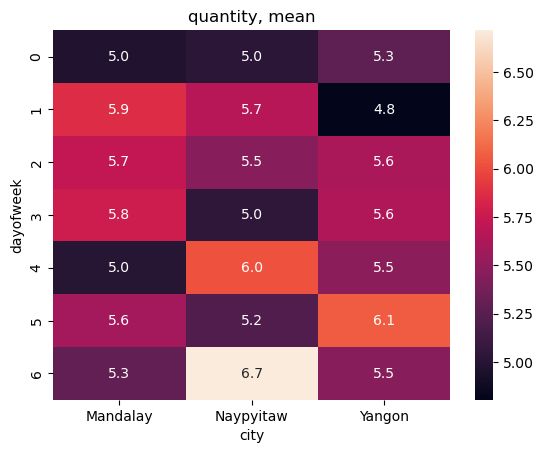

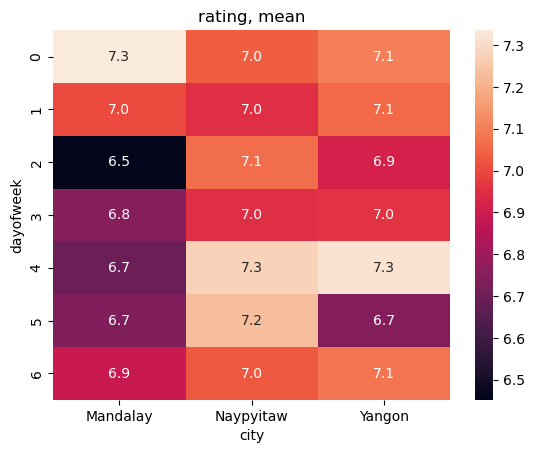

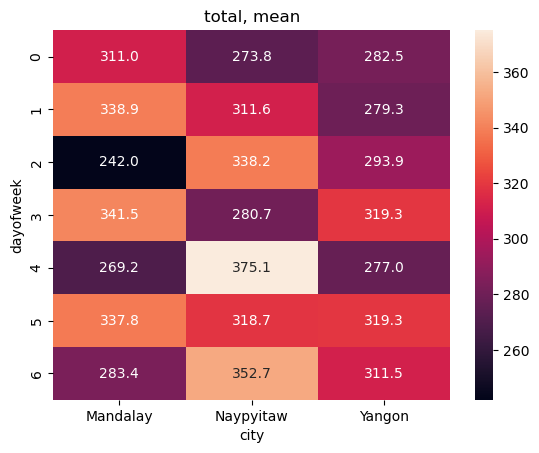

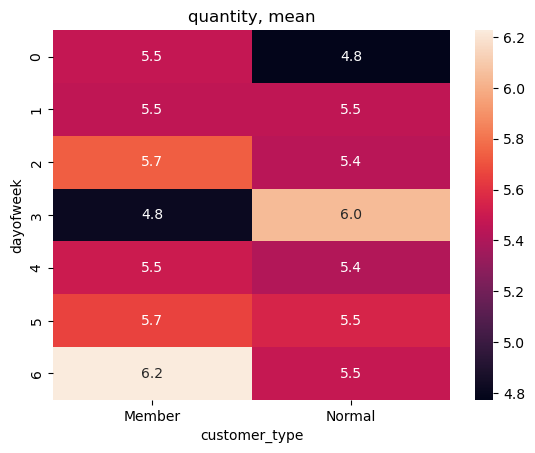

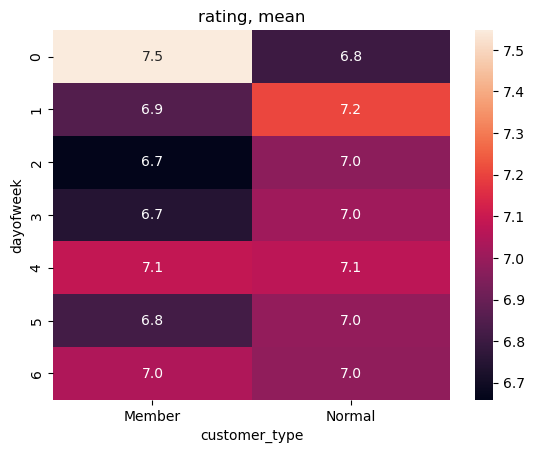

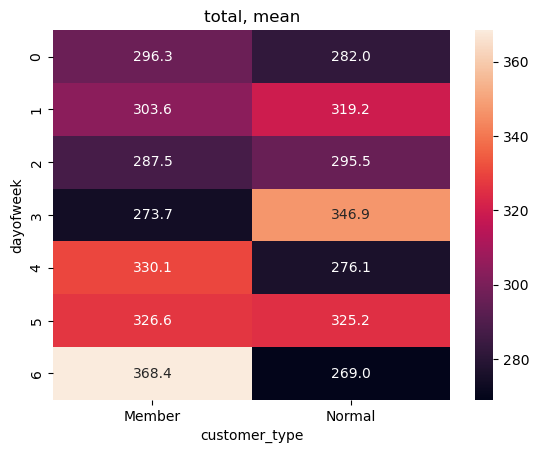

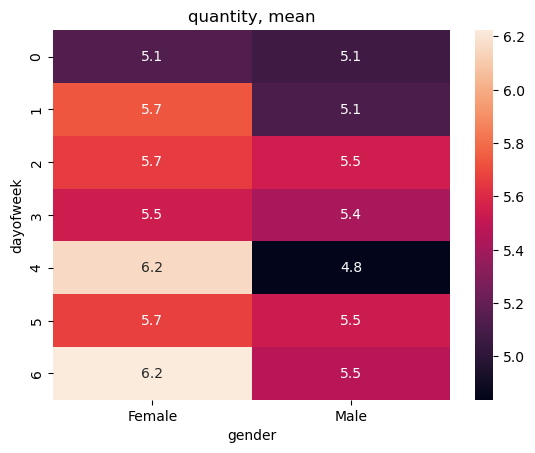

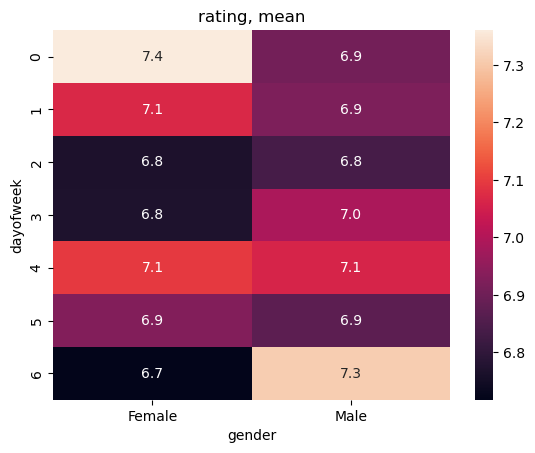

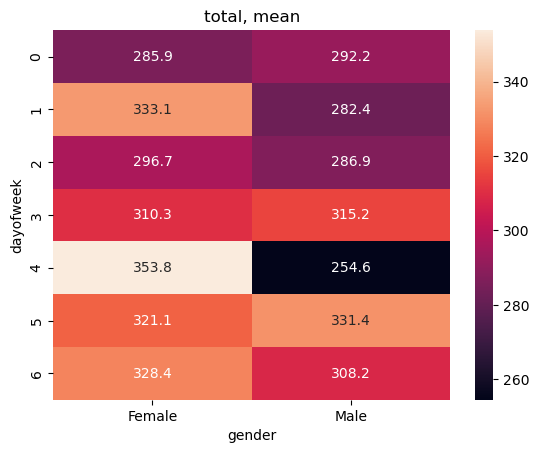

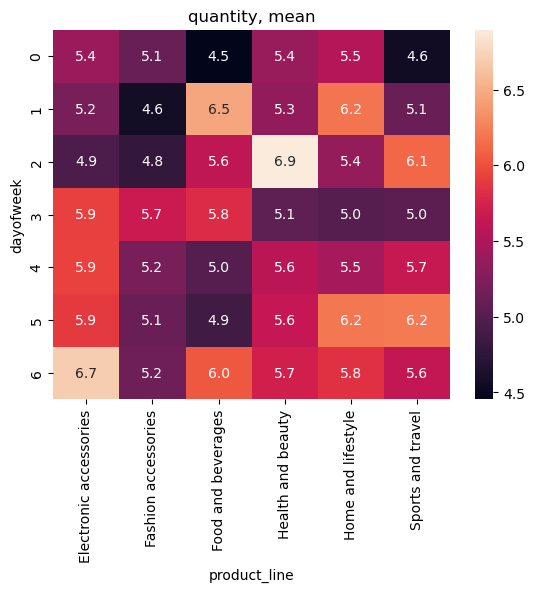

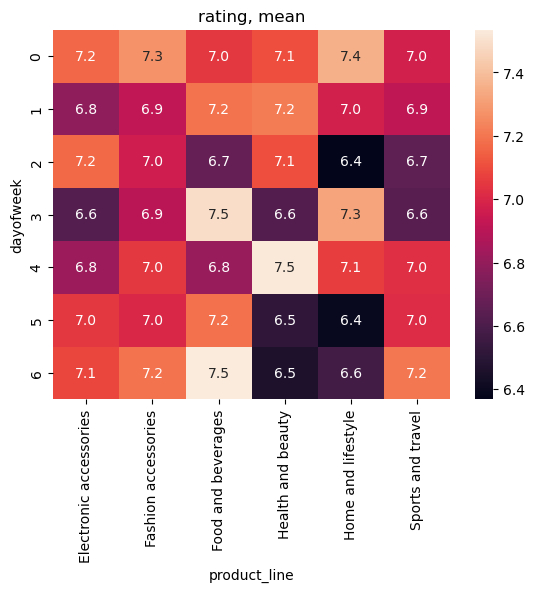

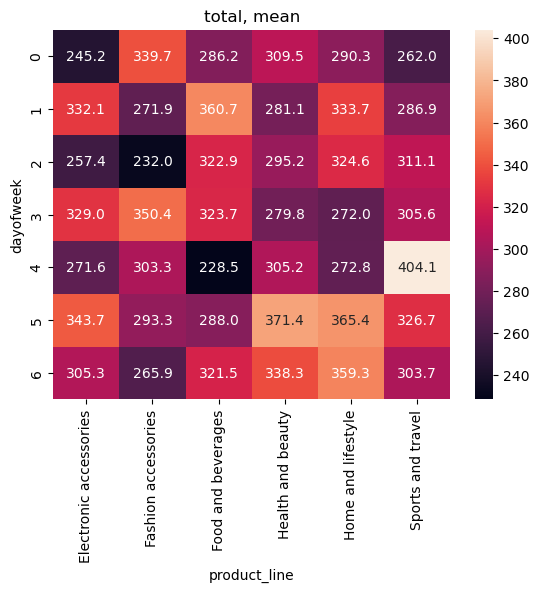

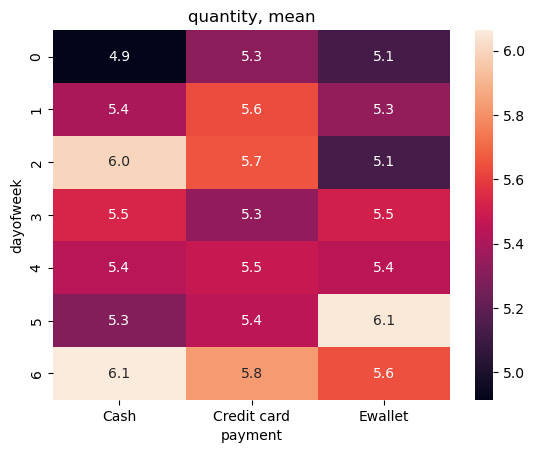

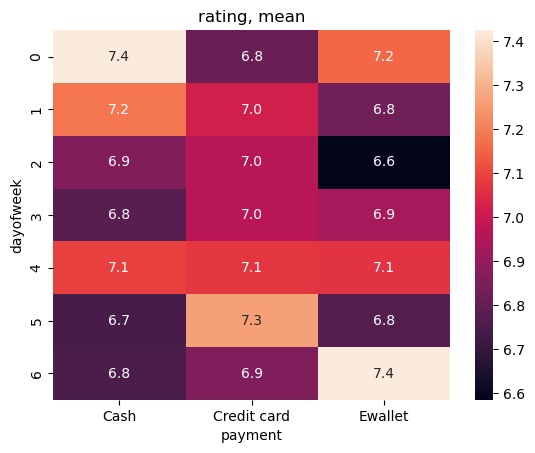

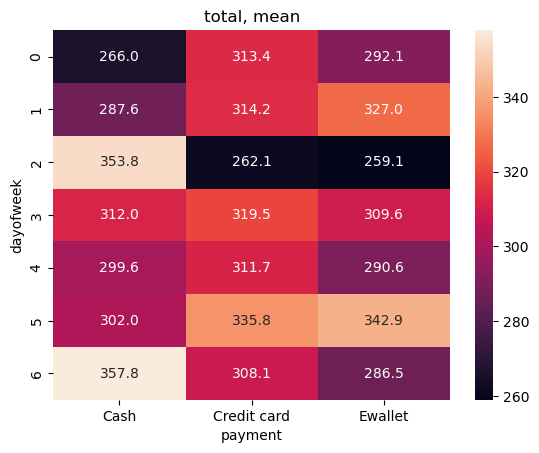

In [229]:
for i in ['city', 'customer_type', 'gender', 'product_line', 'payment']:
    for c in ['quantity', 'rating', 'total']:
        pt = pd.pivot_table(data=df_copy, values=c, index='dayofweek', columns=i, aggfunc='mean')
        sns.heatmap(pt, annot=True, fmt='.1f')
        plt.title(c + ', mean')
        plt.show();

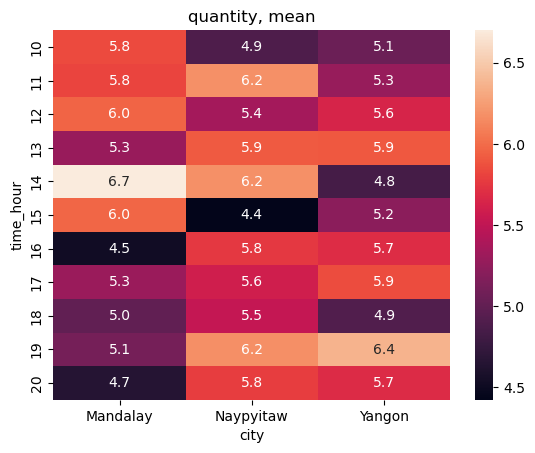

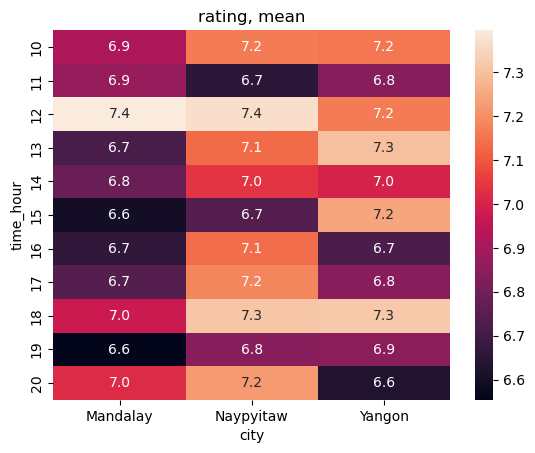

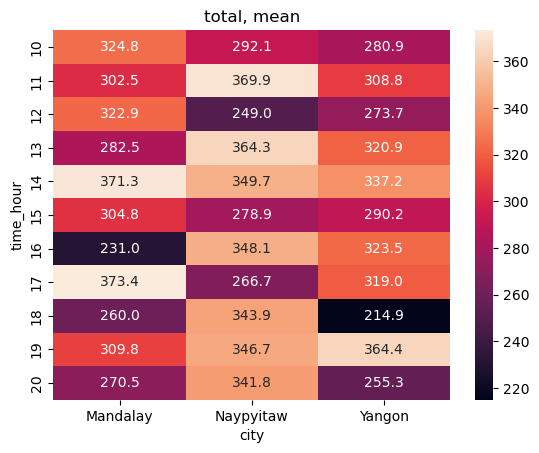

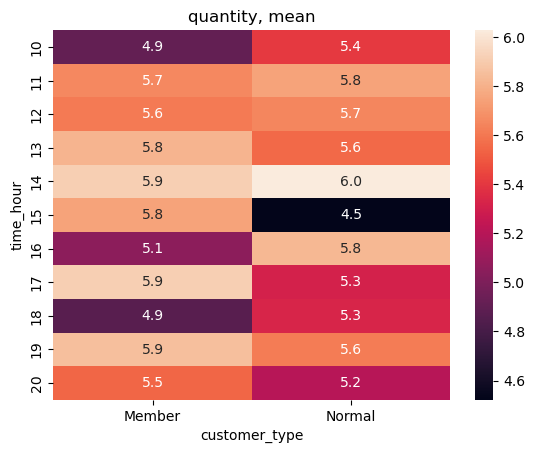

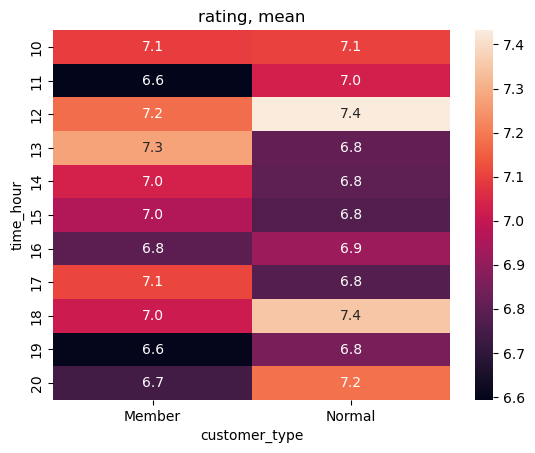

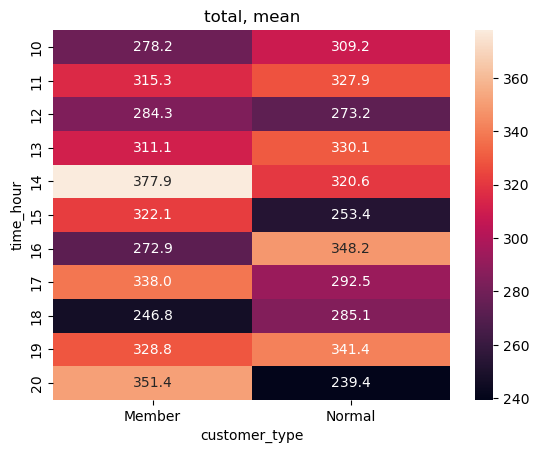

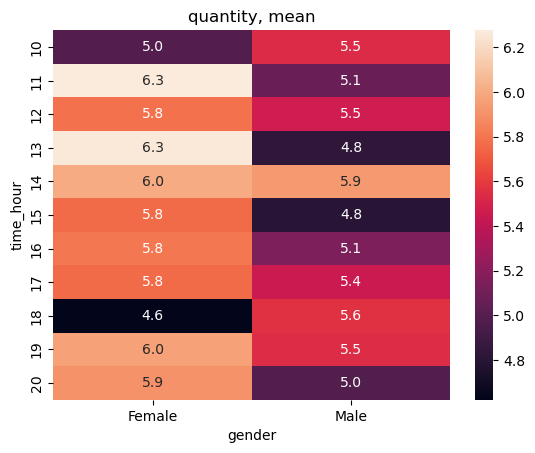

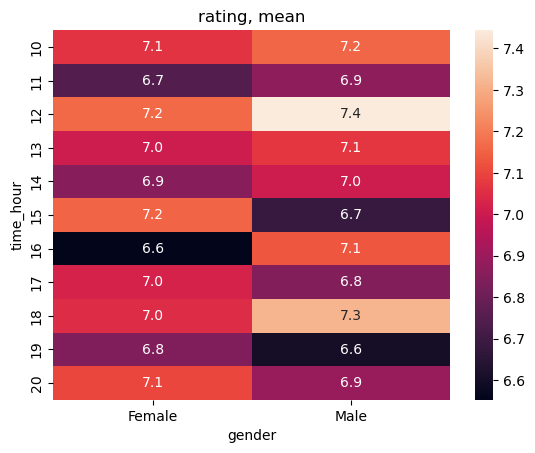

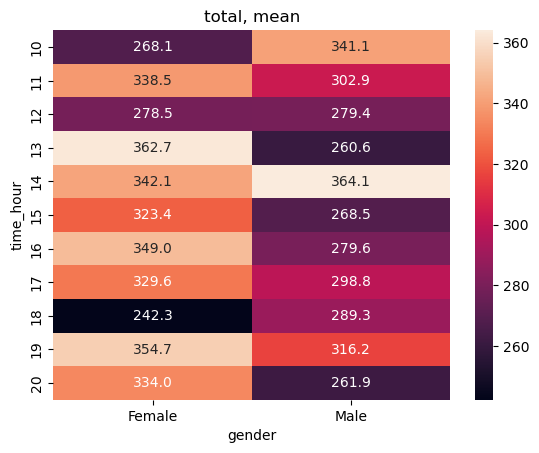

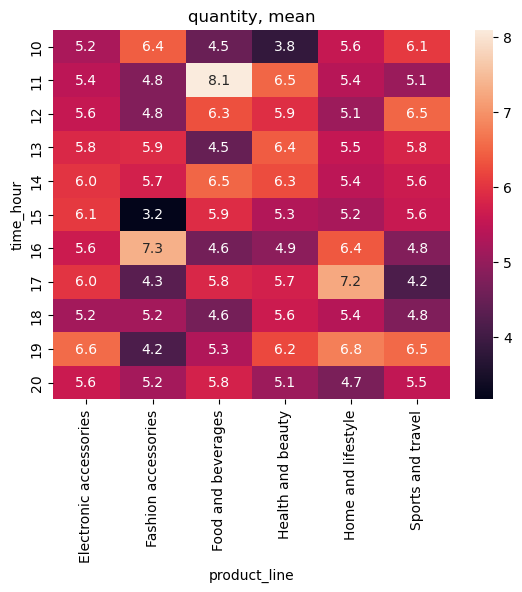

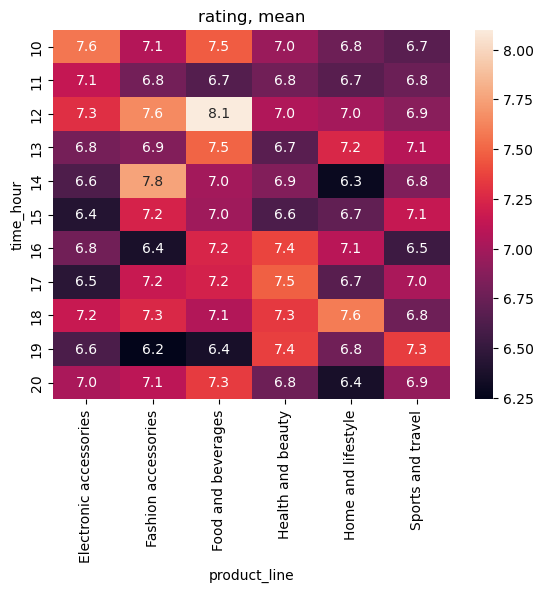

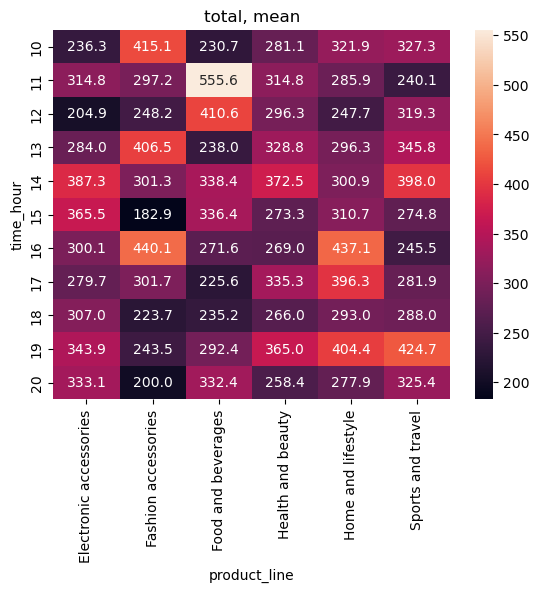

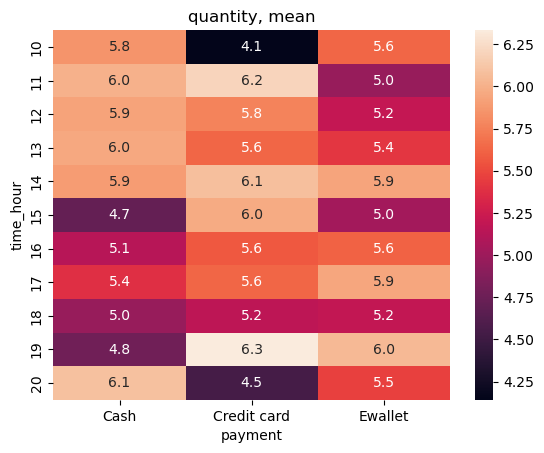

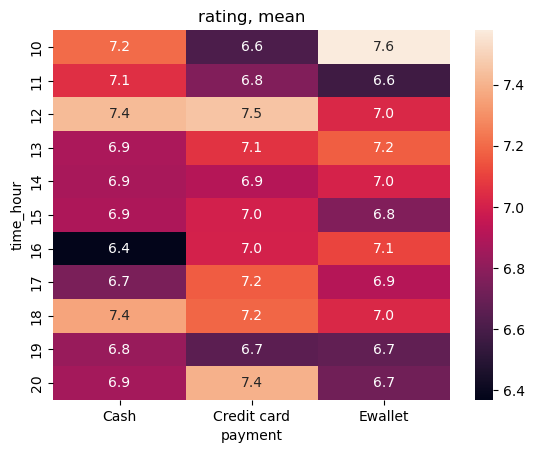

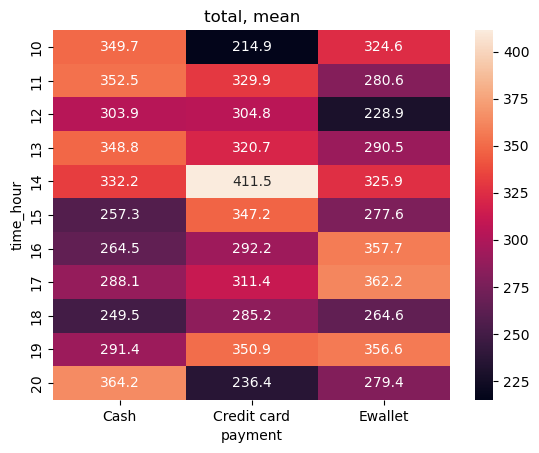

In [230]:
for i in ['city', 'customer_type', 'gender', 'product_line', 'payment']:
    for c in ['quantity', 'rating', 'total']:
        pt = pd.pivot_table(data=df_copy, values=c, index='time_hour', columns=i, aggfunc='mean')
        sns.heatmap(pt, annot=True, fmt='.1f')
        plt.title(c + ', mean')
        plt.show();